In [3]:
from matplotlib import cm 
import gzip
import matplotlib.pyplot as plt
import csv
import numpy as np 
import glob 
import json
import os
import pandas as pd
#import infosys.utils as utils 
from collections import defaultdict
cmap = cm.get_cmap('inferno', 10)

In [72]:
#sorted(list(np.arange(.01, .105, .01))+list(np.arange(.2, .6, .1)))

In [73]:
#len(sorted(list(np.arange(.0, .105, .01))+list(np.arange(.2, .6, .1))))

In [29]:
# load all data and arrange in dataframe

In [4]:
pwd

'/Users/laurajahn/Documents/Git/Marketplace-of-ideas/example'

In [5]:
result_dir = 'results/25102022_friction_vary_friction_and_learning_2_runs/'

In [6]:
# look at single results file
#data = json.load(open('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json'))
#df = pd.DataFrame.from_dict(data, orient='columns')
#df

In [7]:
filenames = glob.glob(os.path.join(result_dir,'*json*')) 
#filenames

In [8]:
dfs = [] # an empty list to store the data frames
for file in filenames:
    data = pd.read_json(file, orient='columns') # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [9]:
temp.head()
#data = pd.read_json('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json', orient='columns')

,mu_friction,learning_friction,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,phi,alpha,theta,pass_friction,human_network,graph_gml,mode,quality,diversity,discriminative_pow
0,0.190,0.155,NaN,0.05,0.01,True,True,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.351980,5.223085,"[0.833007330027801, 0.0]"
1,0.190,0.155,NaN,0.05,0.01,True,True,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.368260,5.279995,"[0.823212160230213, 0.0]"
2,0.200,0.190,NaN,0.05,0.01,True,True,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.394794,5.382040,"[0.8303345388080821, 0.0]"
3,0.200,0.190,NaN,0.05,0.01,True,True,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.431111,5.323404,"[0.817668532094713, 0.0]"
4,0.075,0.080,NaN,0.05,0.01,True,True,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.383824,5.087398,"[0.822958912676747, 0.0]"


In [10]:
# make discriminative_pow column two columns
temp[['dicriminative_pow_tau','dicriminative_pow_pval']] = pd.DataFrame(temp.discriminative_pow.tolist(), index= temp.index)

In [11]:
# Make quality table
qual_agg = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std']).reset_index()
# this makes hierarchical index qual_agg_2 = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std'])

In [12]:
# Make diversity table
div_agg = temp.groupby(['mu_friction', 'learning_friction'])['diversity'].agg(['mean', 'std']).reset_index()

In [13]:
# Make disrcriminative power table
dp_agg = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_tau'].agg(['mean', 'std']).reset_index()


In [14]:
dp_agg_pval = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_pval'].agg(['mean', 'std']).reset_index()

In [15]:
no_learn = qual_agg.loc[qual_agg['learning_friction'] >= 0.04] 
no_learn

,mu_friction,learning_friction,mean,std
0,0.005,0.040,0.380880,0.023540
3,0.025,0.045,0.400057,0.045876
4,0.060,0.185,0.417026,0.015708
5,0.075,0.080,0.366822,0.024045
6,0.075,0.085,0.394386,0.020677
7,0.075,0.090,0.440493,0.049075
8,0.080,0.175,0.439775,0.017174
9,0.080,0.180,0.395415,0.019237
10,0.120,0.125,0.426366,0.037362
13,0.160,0.065,0.377818,0.000605


In [16]:
import seaborn as sns

In [24]:
len(sdt)

30

ValueError: x and y must have same first dimension, but have shapes (101,) and (30,)

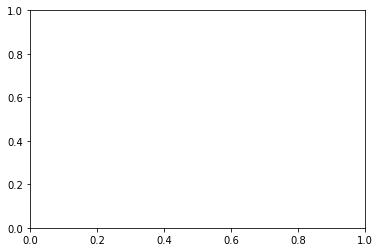

In [18]:

fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 5)
with sns.axes_style("darkgrid"):
    epochs = list(range(101))
    for i in range(5):
        meanst = qual_agg['mean']
        sdt = qual_agg['std']
        ax.plot(epochs, meanst, label=means.ix[i]["label"], c=clrs[i])
        ax.fill_between(epochs, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[i])
    ax.legend()
    ax.set_yscale('log')